In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
try:
    df = pd.read_csv('../data/raw.csv')
except FileNotFoundError:
    raise FileNotFoundError("Файл 'raw.csv' не знайдено.")

text_col = 'text'    
label_col = 'target' 

In [4]:
print("Перші 10 прикладів:")
display(df.head(10))

Перші 10 прикладів:


,text,target
0,"В кінцевому результаті роботою данного інтернет-магазину залишився задоволеним, завдяки вдалій роботі одного із трьох менеджерів, з якими спілкувався по замовленню (Ігор вміє почути клієнта, зрозуміти суть проблеми та неймовірно швидко її вирішити).\nВедуть трішки нечесну (на мій погляд) роботу по формуванню ціни - на сайті вказують мінімальну ціну, а потім при виставленні реквізитів на оплату, в смс, та й по телефону надбавляють ще ""незрозумілу комісію банку"", - вкажіть це в умовах оплати на сайті, ну і назвіть це якось правильно)\nДякую Вам, успіхів і процвітання!\n розгорнути\n згорнути",positive
1,"12.04.16 замовив MD818 (доставили швидко, тут питань немає), звичайно ж я уточнив пару раз оригінальний чи кабель, на що отримав позитивну відповідь. Розпакував отриманий кабель я не виявив написів на кабелі, заходимо на сайт Apple і читаємо що повинна бути напис An Apple Lightning to USB cable has &quot;Designed by Apple in California&quot; and either &quot;Assembled in China,&quot; &quot;Assembed in Vietnam,&quot; or &quot; Indústria Brasileira &quot;on the cable about seven inches from the USB connector. Дзвоню в Стилус, пояснюю що немає напису. Відповідають, що кабель оригінал і все. Я прошу якісь документи що підтверджують де був куплений цей кабель, відповідь негативна. Потім мені просто говорять &quot;привозите здавайте&quot;. Втрачати 499 грн на китайському кабелі мені не хотілося (нехай він навіть MFi сертифікований). Привіз кабель в магазин. &quot;Яка причина повернення?&quot; запитують у мене, я відповідаю &quot;ні лого Apple як на оригіналі&quot;, у відповідь &quot;а, зрозуміло&quot;. Через три хвилини мені дають папірець і кажуть пройти в касу, отримую 499 грн і йду. НІ ПАСПОРТИ ні інших документів не попросили. Мда, більше в ваш магазин немає бажання звертатися. Розгорнутим згорнути",negative
2,"Зірвали передноворічний замовлення, зіпсували празднік.Прічем менеджер весь час (починаючи з 26 грудня) обманював-повідомляв що товар на складі, тільки служба дрставкі перевантажена, три дня сидів удома, чекав доставку, 30 з&#39;ясувалося, що товару немає і коли буде неізвестно.Связался з начальником служби якості, катерина обіцяла розібратися і передзвонити після 7 січня. 25 січня сам подзвонив в магазин-виявляється начальник служби якості і менеджер оформляв замовлення звільнилися і вообщем то нікому пред&#39;являти претензії. наскільки можна всього цього Верма-судити вам я і мої друзі від послуг вишеупомянотго магазину відмовляються і організовуємо антирекламну компанію даного магазину Розгорнутим згорнути",negative
3,"Замовив корпус і блок живлення (комплект) - зі сторінки http://hard.rozetka.com.ua/zalman_zm_m1_plus_aerocool_vx600/p10615903/ перейшов по посиланню на ""є товар з уцінкою"". В описі причину зниження ціни ""порушена цілісність упаковки"". Загалом як би не критично і знижка була приємна. Замовив 17.03. Доставили в термін 21.03. І все б нічого ...\nПри огляді виявив, що в посилці відсутня блок живлення. Набрав оператору - ""Альоша"" порадив оплатити і забрати посилку, а з приводу недопоставки звернутися в сервіс по пошті service@rozetka.com.ua. Що я і зробив в той же день, прикріпивши все доки (фото, накладні, чеки, акт прийому передачі від НП, що підтверджує відсутність БП). Додатково звернувся через форму на сайті описавши ситуацію в двох словах.\nРезультат: через пару днів відгукнувся відділ підтримки (звернення через форму на сайті) - відповідь прозаїчний - смітячи типу, але це була помилка на сайті і ніякого блоку живлення бути не повинно, можете повернути або обміняти товар, на сайті блок є, в накладній є , є навіть папірець супровідна для блоку живлення, і він також вписаний в гарантійному талоні ""розетки"". АЛЕ - сорри його типу немає і не повинно бути))) а юрист мій каже - всі документи є, боки не твої ...\nСам корпус без захисних плівок, упаковка дійсно пошкоджена, присутні сліди використання ... але коли в ціні є блок живлення, це не критично і типу як знаєш, на що йдеш ...\nСлу

In [5]:
total_texts = len(df)
print(f"Кількість текстів: {total_texts}")

Кількість текстів: 3034


In [6]:
df['char_len'] = df[text_col].astype(str).apply(len)
df['word_len'] = df[text_col].astype(str).apply(lambda x: len(x.split()))

print(f"Середня довжина (символи): {df['char_len'].mean():.2f}")
print(f"Медіанна довжина (символи): {df['char_len'].median():.2f}")
print(f"Середня довжина (слова): {df['word_len'].mean():.2f}")
print(f"Медіанна довжина (слова): {df['word_len'].median():.2f}")

Середня довжина (символи): 1096.68
Медіанна довжина (символи): 897.00
Середня довжина (слова): 164.03
Медіанна довжина (слова): 132.00


Розподіл класів:
target
negative    1922
positive    1112
Name: count, dtype: int64


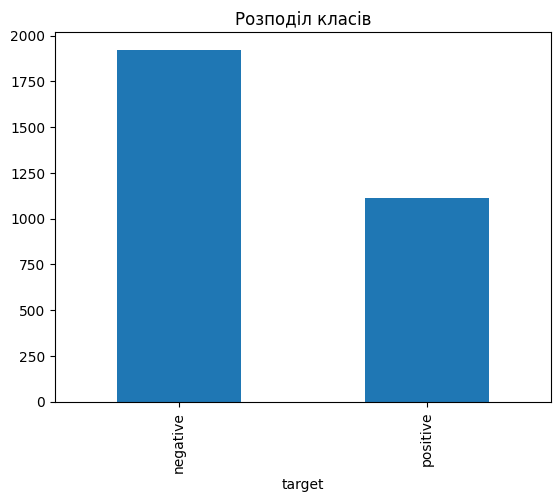

In [7]:
print(f"Розподіл класів:")
class_counts = df[label_col].value_counts()
print(class_counts)

class_counts.plot(kind='bar', title='Розподіл класів')
plt.show()

In [8]:
def basic_cleaning(text):
    text = str(text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r"[’‘`´“”]", "'", text)
    text = re.sub(r'http\S+|www\.\S+', '<URL>', text)
    text = re.sub(r'\S+@\S+', '<EMAIL>', text)
    text = re.sub(r'\+?\d{10,12}', '<PHONE>', text)
    return text

In [9]:
df['cleaned_text'] = df[text_col].apply(basic_cleaning)

print("Приклад нормалізації:")
display(df[[text_col, 'cleaned_text']].sample(5))

Приклад нормалізації:


,text,cleaned_text
478,"Не перший раз замовляю в розетці. Все добре, але вже неодноразово упираюся в дві основні проблеми:\n1. Доставка товару після заказу в магазин на Ярославській (м.Київ) становить 3 дні (з огляду на день замовлення), при тому що в інших магазинах доставляють протягом одного дня. Не зручно якщо потрібен товар терміново (наприклад на подарунок).\n2. Доводиться довго чекати в черзі при отриманні товару. Останній раз час очікування склало більше півгодини, а точніше майже 40 хвилин. Тобто на отримання перевірку і оплату товару - 10 хвилин, очікування - 40 хвилин. Разом час проведений в магазині - 50 хвилин.\nВисновок: Асортимент розширюється, замовлень багато, прибуток зростає, сервіс не поліпшується. Кількість менеджерів на видачу не збільшується. Буду шукати магазини в яких немає необхідності чекати більше півгодини отримання товару.\nПИ.СИ. Черги бувають у всіх інтернет-магазинах, але не більше 10-15 хвилин. Тут уже 3-ий випадок довгого очікування.\n Розгорнутим\n згорнути","Не перший раз замовляю в розетці. Все добре, але вже неодноразово упираюся в дві основні проблеми: 1. Доставка товару після заказу в магазин на Ярославській (м.Київ) становить 3 дні (з огляду на день замовлення), при тому що в інших магазинах доставляють протягом одного дня. Не зручно якщо потрібен товар терміново (наприклад на подарунок). 2. Доводиться довго чекати в черзі при отриманні товару. Останній раз час очікування склало більше півгодини, а точніше майже 40 хвилин. Тобто на отримання перевірку і оплату товару - 10 хвилин, очікування - 40 хвилин. Разом час проведений в магазині - 50 хвилин. Висновок: Асортимент розширюється, замовлень багато, прибуток зростає, сервіс не поліпшується. Кількість менеджерів на видачу не збільшується. Буду шукати магазини в яких немає необхідності чекати більше півгодини отримання товару. ПИ.СИ. Черги бувають у всіх інтернет-магазинах, але не більше 10-15 хвилин. Тут уже 3-ий випадок довгого очікування. Розгорнутим згорнути"
485,"Після отримання товару сервісним відділом довелося мені самому зв'язуватися з ними. Після домовленості сказали що відправлять гроші у вівторок, чекати гроші до кінця тижня. Як ви розумієте їх я тоді не отримав. Після того як я знову зв'язався з ними дізнався що товар висланий був у четвер 23 грудня, а не у вівторок. Сказали чекати у понеділок - вівторок. Так от. Гроші не прийшли і тоді. Сказали чекати до п'ятниці. В кінці кінців сьогодні п'ятниця і мені нічого не можуть сказати досі. Чому я повинний так довго чекати свої гроші, буквально кажучі 2 тижні. Двічі подумайте перед тим як купувати щось там.\n розгорнути\n згорнути","Після отримання товару сервісним відділом довелося мені самому зв'язуватися з ними. Після домовленості сказали що відправлять гроші у вівторок, чекати гроші до кінця тижня. Як ви розумієте їх я тоді не отримав. Після того як я знову зв'язався з ними дізнався що товар висланий був у четвер 23 грудня, а не у вівторок. Сказали чекати у понеділок - вівторок. Так от. Гроші не прийшли і тоді. Сказали чекати до п'ятниці. В кінці кінців сьогодні п'ятниця і мені нічого не можуть сказати досі. Чому я повинний так довго чекати свої гроші, буквально кажучі 2 тижні. Двічі подумайте перед тим як купувати щось там. розгорнути згорнути"
2448,"Подзвонив в магазин запитав чи є в наявності і коли привезуть в магазин, сказали, що привезуть о 16:00, забрати можна буде до 19:00. Вже о 16:00 я вийшов і поїхав в магазин, дзвонив в ~ 16: 35, коли був на під&#39;їзді, перепитав є вже або немає, вони уточнили і сказали, що потрібно буде почекати до 15 хвилин. У підсумку о 16:50 я вже був в магазині, і о 17:10 винесли планшет, АЛЕ НЕ ТОЙ ЯКИЙ Я ЗАМОВЛЯВ. Я ПРОСТО В ШОЦІ, МАЛО ТОГО ЧЕКАВ, ХОЧА СПОКОНВІКУ МАЛИ ПРИВЕЗТИ О 16:00, ТАК Я ІЗ МАГАЗИНУ ТІЛЬКИ ВИЙШОВ О 17:20. ВИТРАТИВ КУПУ ЧАСУ, ЧЕКАВ, А ПЛАНШЕТ НЕ ТОЙ ПРИВЕЗЛИ. Я НЕ РЕКОМЕНДУЮ ЦЕЙ МАГАЗИН ТА ПРОБЛЕМИ З ЦИМ МАГАЗИНОМ ВЖЕ ВДРУГЕ (в перший раз мені чинили Ipad по гарантії, і поставили неоригінальні запчастини, а проблема піс

In [10]:
duplicates_count = df.duplicated(subset=['cleaned_text']).sum()
duplicates_pct = (duplicates_count / total_texts) * 100
print(f"Точні дублі: {duplicates_count} ({duplicates_pct:.2f}%)")

Точні дублі: 9 (0.30%)


In [11]:
short_texts = df[df['cleaned_text'].apply(lambda x: len(x.split()) < 5)]
print(f"Короткі тексти (< 5 слів): {len(short_texts)}")

Короткі тексти (< 5 слів): 0


In [12]:
garbage_rows = df[df['cleaned_text'].str.match(r'^[\d\W_]+$')]
print(f"Сміттєві рядки (лише цифри/символи): {len(garbage_rows)}")

Сміттєві рядки (лише цифри/символи): 0


In [13]:
df['id'] = range(1, len(df) + 1)
labels_df = df[['id', label_col]].copy()
labels_df.columns = ['id', 'label']

labels_df.to_csv('../data/labels.csv', index=False)

In [14]:
df[['id', 'cleaned_text']].to_csv('../data/processed.csv', index=False)

In [15]:
"""
ВИСНОВОК:

Зібрано та проаналізовано датасет із 3034 українських відгуків на товари. Тексти довгі (медіана 132 слова),
що є плюсом для навчання моделі. Якість даних висока: повністю відсутні "сміттєві" рядки та короткі тексти і 
кількість дублікатів мала (0.3%).

Ризики:
1. Дисбаланс класів: негативних відгуків (1922) майже вдвічі більше, ніж позитивних (1112). Модель може
краще розпізнавати негативні відгуки, ігноруючи позитивні.
2. Шум: у прикладах після нормалізації залишились фрази із сайту (наприклад, "розгорнути", "згорнути") та 
HTML-сутності (наприклад, &#39;), які треба чистити окремо.

Треба доробити:
- збалансувати класи
- видалити технічні фрази ("розгорнути", "згорнути")
"""

'\nВИСНОВОК:\n\nЗібрано та проаналізовано датасет із 3034 українських відгуків на товари. Тексти довгі (медіана 132 слова),\nщо є плюсом для навчання моделі. Якість даних висока: повністю відсутні "сміттєві" рядки та короткі тексти і \nкількість дублікатів мала (0.3%).\n\nРизики:\n1. Дисбаланс класів: негативних відгуків (1922) майже вдвічі більше, ніж позитивних (1112). Модель може\nкраще розпізнавати негативні відгуки, ігноруючи позитивні.\n2. Шум: у прикладах після нормалізації залишились фрази із сайту (наприклад, "розгорнути", "згорнути") та \nHTML-сутності (наприклад, &#39;), які треба чистити окремо.\n\nТреба доробити:\n- збалансувати класи\n- видалити технічні фрази ("розгорнути", "згорнути")\n'

In [31]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Додаємо кореневу директорію проєкту до шляхів пошуку модулів
sys.path.append(os.path.abspath('..'))

Failed to read module file 'c:\Users\Андріана\AppData\Local\Programs\Python\Python312\Lib\pydoc_data\topics.py' for module 'pydoc_data.topics': UnicodeDecodeError
Traceback (most recent call last):
  File "C:\Users\Андріана\AppData\Roaming\Python\Python312\site-packages\IPython\core\extensions.py", line 62, in load_extension
    return self._load_extension(module_str)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Андріана\AppData\Roaming\Python\Python312\site-packages\IPython\core\extensions.py", line 77, in _load_extension
    mod = import_module(module_str)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Андріана\AppData\Local\Programs\Python\Python312\Lib\importlib\__init__.py", line 90, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1387, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load


In [34]:
from src.preprocess import preprocess
# Приклад коду для статистики
df['processed'] = df['text'].apply(lambda x: preprocess(x)['clean'])

print(f"Дублікати до: {df['text'].duplicated().sum()}")
print(f"Дублікати після: {df['processed'].duplicated().sum()}")
print(f"Середня довжина (символи) до: {df['text'].str.len().mean():.1f}")
print(f"Середня довжина (символи) після: {df['processed'].str.len().mean():.1f}")

Failed to read module file 'd:\uni2\semestr2\nlp\sentiment\src\preprocess.py' for module 'src.preprocess': UnicodeDecodeError
Traceback (most recent call last):
  File "C:\Users\Андріана\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\deduperreload\deduperreload.py", line 556, in maybe_reload_module
    new_source_code = f.read()
                      ^^^^^^^^
  File "c:\Users\Андріана\AppData\Local\Programs\Python\Python312\Lib\encodings\cp1251.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 828: character maps to <undefined>


Дублікати до: 9
Дублікати після: 9
Середня довжина (символи) до: 1096.7
Середня довжина (символи) після: 1057.0


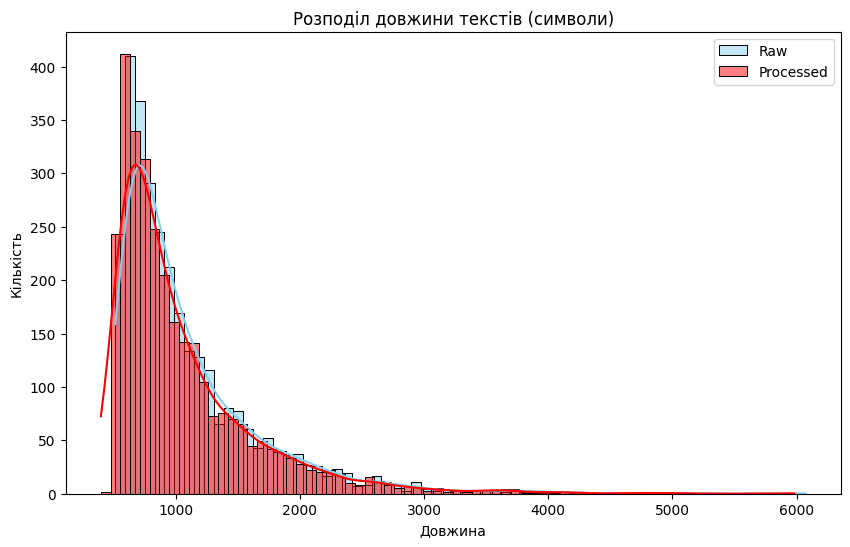

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['text'].str.len(), color="skyblue", label='Raw', kde=True)
sns.histplot(df['processed'].str.len(), color="red", label='Processed', kde=True)

plt.title('Розподіл довжини текстів (символи)')
plt.xlabel('Довжина')
plt.ylabel('Кількість')
plt.legend()
plt.show()